# Análisis predictivo

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas.

In [ ]:
# carga de datos
import time
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

Cargamos todas las librerias necesarias para nuestro estudio

In [ ]:
# machine learning
from feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.utils import resample,shuffle

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Carga de Datos

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab una vez listos desde la etapa anterior.

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
df = pd.read_excel("/content/Terrorismo_limpio_organizaciones_importantes.xlsx")

In [ ]:
data_1="Terrorismo_limpio_organizaciones_importantes"
df = pd.read_excel(data_1 + ".xlsx", header=0, parse_dates=False, index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10973 entries, 11 to 12
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   day                  10973 non-null  int64         
 1   país_txt             10973 non-null  object        
 2   región_txt           10973 non-null  object        
 3   ciudad               10973 non-null  object        
 4   latitud              10973 non-null  int64         
 5   longitud             10973 non-null  int64         
 6   crit                 10973 non-null  int64         
 7   multiple             10973 non-null  int64         
 8   éxito                10973 non-null  int64         
 9   suicidio             10973 non-null  int64         
 10  tipodeataque_txt     10973 non-null  object        
 11  tipoobjetivo         10973 non-null  object        
 12  nacionalidadvictima  10973 non-null  object        
 13  organizacion         10973 non-nu

In [ ]:
df.head()

,day,país_txt,región_txt,ciudad,latitud,longitud,crit,multiple,éxito,suicidio,...,tipoarmamento,muertos,muertosterroristas,heridos,secuestrovictima,rescate,sumario,motivo,bajas,fecha
month,,,,,,,,,,,,,,,,,,,,,
11,30,South Africa,Sub-Saharan Africa,Unknown,-25476646,30978892,1,0,1,0,...,Explosives,2,0,0,0,0,nada que aportar,nada que aportar,2,1976-11-30
2,24,South Africa,Sub-Saharan Africa,Daveyton,-26141151,28427501,1,0,1,0,...,Explosives,0,0,0,0,0,nada que aportar,nada que aportar,0,1977-02-24
7,15,South Africa,Sub-Saharan Africa,Durban,-29861824,31008293,1,0,1,0,...,Unknown,0,0,0,0,0,nada que aportar,nada que aportar,0,1977-07-15
7,26,South Africa,Sub-Saharan Africa,Vosloorus,-26355773,28208044,1,0,0,0,...,Unknown,1,1,0,0,0,nada que aportar,nada que aportar,1,1977-07-26
7,26,South Africa,Sub-Saharan Africa,Dobsonville,-26252697,27870275,1,0,1,0,...,Unknown,1,1,2,0,0,nada que aportar,nada que aportar,3,1977-07-26


In [ ]:
df['organizacion'].apply(lambda organizacion: organizacion.split()[-1]).value_counts()[:8]

Al-Shabaab    4110
Haram         3005
extremists    1288
ANC            574
UNITA          400
LRA            331
ADF            331
MNR            285
Name: organizacion, dtype: int64

In [ ]:
df.loc[df['organizacion'] != ('Al-Shabaab','Boko Haram','Fulani extremists','African National Congress (South Africa)','National Union for the Total Independence of Angola (UNITA)','Allied Democratic Forces (ADF)')]

,day,país_txt,región_txt,ciudad,latitud,longitud,crit,multiple,éxito,suicidio,...,tipoarmamento,muertos,muertosterroristas,heridos,secuestrovictima,rescate,sumario,motivo,bajas,fecha
month,,,,,,,,,,,,,,,,,,,,,
11,30,South Africa,Sub-Saharan Africa,Unknown,-25476646,30978892,1,0,1,0,...,Explosives,2,0,0,0,0,nada que aportar,nada que aportar,2,1976-11-30
2,24,South Africa,Sub-Saharan Africa,Daveyton,-26141151,28427501,1,0,1,0,...,Explosives,0,0,0,0,0,nada que aportar,nada que aportar,0,1977-02-24
7,15,South Africa,Sub-Saharan Africa,Durban,-29861824,31008293,1,0,1,0,...,Unknown,0,0,0,0,0,nada que aportar,nada que aportar,0,1977-07-15
7,26,South Africa,Sub-Saharan Africa,Vosloorus,-26355773,28208044,1,0,0,0,...,Unknown,1,1,0,0,0,nada que aportar,nada que aportar,1,1977-07-26
7,26,South Africa,Sub-Saharan Africa,Dobsonville,-26252697,27870275,1,0,1,0,...,Unknown,1,1,2,0,0,nada que aportar,nada que aportar,3,1977-07-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,28,Democratic Republic of the Congo,Sub-Saharan Africa,Beni,495944,29459606,1,0,1,0,...,Explosives,0,0,3,0,0,nada que aportar,nada que aportar,3,2019-12-28
12,29,Niger,Sub-Saharan Africa,Komabangou,13691111,1282778,1,0,1,0,...,Firearms,2,1,0,0,0,nada que aportar,nada que aportar,2,2019-12-29
12,29,Nigeria,Sub-Saharan Africa,Mandaragirau,10697343,12332069,1,0,1,0,...,Firearms,1,0,0,1,0,nada que aportar,nada que aportar,1,2019-12-29


In [ ]:
df.info

<bound method DataFrame.info of        day                          país_txt          región_txt  \
month                                                              
11      30                      South Africa  Sub-Saharan Africa   
2       24                      South Africa  Sub-Saharan Africa   
7       15                      South Africa  Sub-Saharan Africa   
7       26                      South Africa  Sub-Saharan Africa   
7       26                      South Africa  Sub-Saharan Africa   
...    ...                               ...                 ...   
12      28  Democratic Republic of the Congo  Sub-Saharan Africa   
12      29                             Niger  Sub-Saharan Africa   
12      29                           Nigeria  Sub-Saharan Africa   
12      29  Democratic Republic of the Congo  Sub-Saharan Africa   
12      31                          Cameroon  Sub-Saharan Africa   

             ciudad   latitud  longitud  crit  multiple  éxito  suicidio  ...  \
mo

In [ ]:
df['organizacion'].value_counts().nlargest(500)[0:15]


Al-Shabaab           4110
Boko Haram           3005
Fulani extremists     932
ANC                   574
UNITA                 400
LRA                   331
ADF                   331
MNR                   285
Separatists           214
Muslim extremists     202
Hutu extremists       154
JNIM                  150
Mayi Mayi             147
SPLM-IO               138
Name: organizacion, dtype: int64

In [ ]:
df['organizacion'].str.replace("'",'').astype(object)

month
11            ANC
2             ANC
7             ANC
7             ANC
7             ANC
         ...     
12            ADF
12           JNIM
12     Boko Haram
12            ADF
12    Separatists
Name: organizacion, Length: 10973, dtype: object

In [ ]:
df['organizacion'] = df['organizacion'].replace('African National Congress (South Africa)', 'ANC')
df['organizacion'] = df['organizacion'].replace('National Union for the Total Independence of Angola (UNITA)', 'UNITA')
df['organizacion'] = df['organizacion'].replace('Allied Democratic Forces (ADF)', 'ADF')
df['organizacion'] = df['organizacion'].replace("Lord's Resistance Army (LRA)", 'LRA')
df['organizacion'] = df['organizacion'].replace('Mozambique National Resistance Movement (MNR)', 'MNR')
df['organizacion'] = df['organizacion'].replace('Jamaat Nusrat al-Islam wal Muslimin (JNIM)', 'JNIM')
df['organizacion'] = df['organizacion'].replace("Sudan People's Liberation Movement in Opposition (SPLM-IO)", 'SPLM-IO')

In [ ]:
df['organizacion'].value_counts().nlargest(500)[0:15]

Al-Shabaab           4110
Boko Haram           3005
Fulani extremists     932
ANC                   574
UNITA                 400
LRA                   331
ADF                   331
MNR                   285
Separatists           214
Muslim extremists     202
Hutu extremists       154
JNIM                  150
Mayi Mayi             147
SPLM-IO               138
Name: organizacion, dtype: int64

In [ ]:
options =['Al-Shabaab','Boko Haram','Fulani extremists','ANC','UNITA', 'ADF','LRA','MNR','Separatists','Jamjaweed', 'Muslim extremists','Hutu extremists','JNIM','Mayi Mayi', 'SPLM-IO']
  # selecting rows based on condition
d_o = df.loc[df['organizacion'].isin(options)]
print('\nd_o :\n', d_o)


d_o :
        day                          país_txt          región_txt  \
month                                                              
11      30                      South Africa  Sub-Saharan Africa   
2       24                      South Africa  Sub-Saharan Africa   
7       15                      South Africa  Sub-Saharan Africa   
7       26                      South Africa  Sub-Saharan Africa   
7       26                      South Africa  Sub-Saharan Africa   
...    ...                               ...                 ...   
12      28  Democratic Republic of the Congo  Sub-Saharan Africa   
12      29                             Niger  Sub-Saharan Africa   
12      29                           Nigeria  Sub-Saharan Africa   
12      29  Democratic Republic of the Congo  Sub-Saharan Africa   
12      31                          Cameroon  Sub-Saharan Africa   

             ciudad   latitud  longitud  crit  multiple  éxito  suicidio  ...  \
month                     

In [ ]:
d_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10973 entries, 11 to 12
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   day                  10973 non-null  int64         
 1   país_txt             10973 non-null  object        
 2   región_txt           10973 non-null  object        
 3   ciudad               10973 non-null  object        
 4   latitud              10973 non-null  int64         
 5   longitud             10973 non-null  int64         
 6   crit                 10973 non-null  int64         
 7   multiple             10973 non-null  int64         
 8   éxito                10973 non-null  int64         
 9   suicidio             10973 non-null  int64         
 10  tipodeataque_txt     10973 non-null  object        
 11  tipoobjetivo         10973 non-null  object        
 12  nacionalidadvictima  10973 non-null  object        
 13  organizacion         10973 non-nu

In [ ]:
d_o.head()

,day,país_txt,región_txt,ciudad,latitud,longitud,crit,multiple,éxito,suicidio,...,tipoarmamento,muertos,muertosterroristas,heridos,secuestrovictima,rescate,sumario,motivo,bajas,fecha
month,,,,,,,,,,,,,,,,,,,,,
11,30,South Africa,Sub-Saharan Africa,Unknown,-25476646,30978892,1,0,1,0,...,Explosives,2,0,0,0,0,nada que aportar,nada que aportar,2,1976-11-30
2,24,South Africa,Sub-Saharan Africa,Daveyton,-26141151,28427501,1,0,1,0,...,Explosives,0,0,0,0,0,nada que aportar,nada que aportar,0,1977-02-24
7,15,South Africa,Sub-Saharan Africa,Durban,-29861824,31008293,1,0,1,0,...,Unknown,0,0,0,0,0,nada que aportar,nada que aportar,0,1977-07-15
7,26,South Africa,Sub-Saharan Africa,Vosloorus,-26355773,28208044,1,0,0,0,...,Unknown,1,1,0,0,0,nada que aportar,nada que aportar,1,1977-07-26
7,26,South Africa,Sub-Saharan Africa,Dobsonville,-26252697,27870275,1,0,1,0,...,Unknown,1,1,2,0,0,nada que aportar,nada que aportar,3,1977-07-26


In [ ]:
df = df.drop(columns=['fecha'])

In [ ]:
df.organizacion

month
11            ANC
2             ANC
7             ANC
7             ANC
7             ANC
         ...     
12            ADF
12           JNIM
12     Boko Haram
12            ADF
12    Separatists
Name: organizacion, Length: 10973, dtype: object

In [ ]:
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10973 entries, 11 to 12
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   day                  10973 non-null  int64 
 1   país_txt             10973 non-null  object
 2   región_txt           10973 non-null  object
 3   ciudad               10973 non-null  object
 4   latitud              10973 non-null  int64 
 5   longitud             10973 non-null  int64 
 6   crit                 10973 non-null  int64 
 7   multiple             10973 non-null  int64 
 8   éxito                10973 non-null  int64 
 9   suicidio             10973 non-null  int64 
 10  tipodeataque_txt     10973 non-null  object
 11  tipoobjetivo         10973 non-null  object
 12  nacionalidadvictima  10973 non-null  object
 13  organizacion         10973 non-null  object
 14  tipoarmamento        10973 non-null  object
 15  muertos              10973 non-null  int64 
 16  muerto

In [ ]:
d_o['organizacion'].describe()

count          10973
unique            14
top       Al-Shabaab
freq            4110
Name: organizacion, dtype: object

In [ ]:
d_o = d_o.drop(columns=['fecha'])

In [ ]:
df2 = d_o.drop(['organizacion','crit','rescate' , 'motivo','sumario'] , axis=1)
df1 = d_o.organizacion

In [ ]:
#method to parse and plot sklearn confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [ ]:
from sklearn.model_selection import train_test_split

def get_min_required_rows(test_size=0.2):
    return 1 / test_size

def make_stratified_splits(df, y_col="label", test_size=0.2):
    """
        for any class with rows less than min_required_rows corresponding to the input test_size,
        all the rows associated with the specific class will have a copy in both the train and test splits.

        example: if test_size is 0.2 (20% otherwise),
        min_required_rows = 5 (which is obtained from 1 / test_size i.e., 1 / 0.2)
        where the resulting splits will have 4 train rows (80%), 1 test row (20%)..
    """

    id_col = "id"
    temp_col = "same-class-rows"

    class_to_counts = df[y_col].value_counts()
    df[temp_col] = df[y_col].apply(lambda y: class_to_counts[y])

    min_required_rows = get_min_required_rows(test_size)
    copy_rows = df[df[temp_col] < min_required_rows].copy(deep=True)
    valid_rows = df[df[temp_col] >= min_required_rows].copy(deep=True)

    X = valid_rows[id_col].tolist()
    y = valid_rows[y_col].tolist()

    # notice, this train_test_split is a stratified split
    X_train, X_test, _, _ = train_test_split(X, y, test_size=test_size, random_state=43, stratify=y)

    X_test = X_test + copy_rows[id_col].tolist()
    X_train = X_train + copy_rows[id_col].tolist()

    df.drop([temp_col], axis=1, inplace=True)

    test_df = df[df[id_col].isin(X_test)].copy(deep=True)
    train_df = df[df[id_col].isin(X_train)].copy(deep=True)

    print (f"number of rows in the original dataset: {len(df)}")

    test_prop = round(len(test_df) / len(df) * 100, 2)
    train_prop = round(len(train_df) / len(df) * 100, 2)
    print (f"number of rows in the splits: {len(train_df)} ({train_prop}%), {len(test_df)} ({test_prop}%)")

    return train_df, test_df

In [ ]:
!pip install basemap

In [ ]:
# libraries for EDA
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#libraries for Data Preprocessing
import pandas as pd
import numpy as np
import scipy as sc
import itertools

#libraries for Data Mining - Classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

#library for plotting crimes on Asia map
from mpl_toolkits.basemap import Basemap

#library to suppress warnings
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
#Stratified sampling of dataset
X = df2
Y = df1
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=1/3, random_state=85)
expected = ytest
#Lable encoding of objects -> numeric_objects
le=LabelEncoder()
for col in xtest.columns.values:
    if xtest[col].dtypes=='object':
       data=xtrain[col].append(xtest[col])
       le.fit(data.values)
       xtrain[col]=le.transform(xtrain[col])
       xtest[col]=le.transform(xtest[col])

In [ ]:
#encoded numerical data
xtrain.head()

,day,país_txt,región_txt,ciudad,latitud,longitud,multiple,éxito,suicidio,tipodeataque_txt,tipoobjetivo,nacionalidadvictima,tipoarmamento,muertos,muertosterroristas,heridos,secuestrovictima,bajas
month,,,,,,,,,,,,,,,,,,
4,8,17,0,1565,9933333,8883333,1,1,0,2,13,38,1,0,0,1,0,1
6,23,12,0,1074,3382561,41415802,0,1,0,6,12,47,7,0,0,0,1,1
11,15,17,0,1600,10799222,13533599,1,1,0,0,12,38,2,1,0,0,0,1
11,24,21,0,2487,2059818,45326114,0,1,0,2,18,66,1,0,0,0,0,0
6,1,22,0,3140,-26810437,27827077,1,1,0,2,1,48,1,1,0,1,0,2


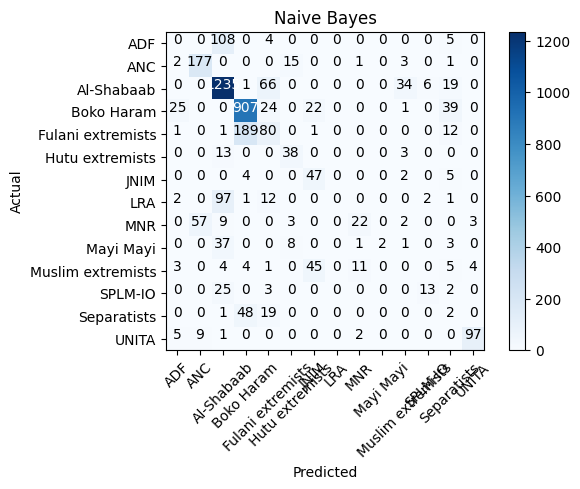

In [ ]:
#Train Gaussian Naive Bayes model and get performance measures
model1 = GaussianNB()
model1.fit(xtrain, ytrain)
predicted1 = model1.predict(xtest)

cr1 = metrics.classification_report(expected, predicted1)
cm1 = metrics.confusion_matrix(expected, predicted1)

fs1 = f1_score(expected, predicted1, average="macro")
ps1 = precision_score(expected, predicted1, average="macro")
rs1 = recall_score(expected, predicted1, average="macro")
as1 = accuracy_score(expected, predicted1)

plt.figure()
plot_confusion_matrix(cm1, classes=model1.classes_, title='Naive Bayes')

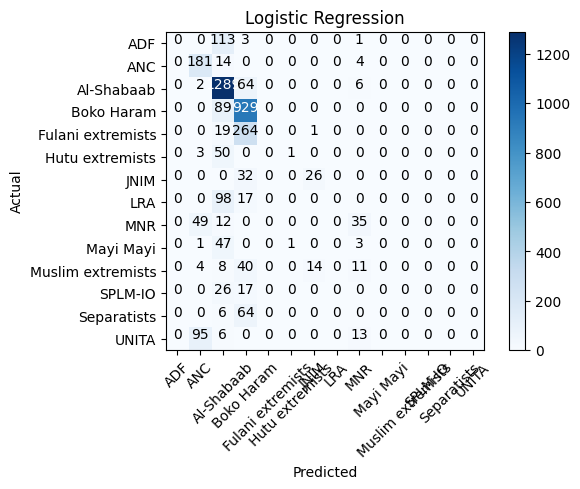

In [ ]:
#Train Logistic regression model and get performance measures
model2 = LogisticRegression()
model2.fit(xtrain, ytrain)
predicted2 = model2.predict(xtest)

cr2 = metrics.classification_report(expected, predicted2)
cm2 = metrics.confusion_matrix(expected, predicted2)

fs2 = f1_score(expected, predicted2, average="macro")
ps2 = precision_score(expected, predicted2, average="macro")
rs2 = recall_score(expected, predicted2, average="macro")
as2 = accuracy_score(expected, predicted2)
plt.figure()
plot_confusion_matrix(cm2, classes=model2.classes_, title='Logistic Regression')

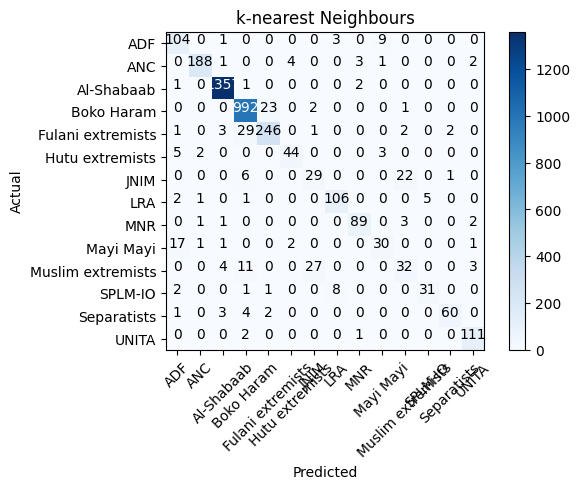

In [ ]:
#Train kNN model and get performance measures
model3 = KNeighborsClassifier()
model3.fit(xtrain, ytrain)
predicted3 = model3.predict(xtest)

cr3 = metrics.classification_report(expected, predicted3)
cm3 = metrics.confusion_matrix(expected, predicted3)

fs3 = f1_score(expected, predicted3, average="macro")
ps3 = precision_score(expected, predicted3, average="macro")
rs3 = recall_score(expected, predicted3, average="macro")
as3 = accuracy_score(expected, predicted3)
plt.figure()
plot_confusion_matrix(cm3, classes=model3.classes_, title='k-nearest Neighbours')

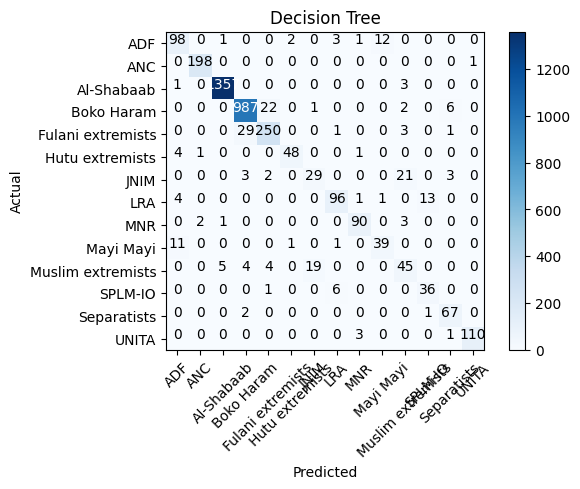

In [ ]:
#Train Decision Tree model and get performance measures
model4 = DecisionTreeClassifier()
model4.fit(xtrain, ytrain)
predicted4 = model4.predict(xtest)

cr4 = metrics.classification_report(expected, predicted4)
cm4 = metrics.confusion_matrix(expected, predicted4)

fs4 = f1_score(expected, predicted4, average="macro")
ps4 = precision_score(expected, predicted4, average="macro")
rs4 = recall_score(expected, predicted4, average="macro")
as4 = accuracy_score(expected, predicted4)
plt.figure()
plot_confusion_matrix(cm4, classes=model4.classes_, title='Decision Tree')

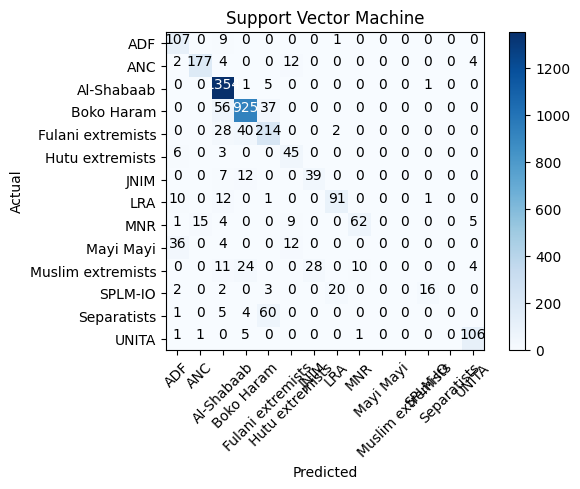

In [ ]:
#Train Support Vector Machine model and get performance measures
model5 = SVC()
model5.fit(xtrain, ytrain)
predicted5 = model5.predict(xtest)

cr5 = metrics.classification_report(expected, predicted5)
cm5 = metrics.confusion_matrix(expected, predicted5)

fs5 = f1_score(expected, predicted5, average="macro")
ps5 = precision_score(expected, predicted5, average="macro")
rs5 = recall_score(expected, predicted5, average="macro")
as5 = accuracy_score(expected, predicted5)
plt.figure()
plot_confusion_matrix(cm5, classes=model5.classes_, title='Support Vector Machine')

In [ ]:
#dictionaries for performance measure of all 5 models
acc_scores = pd.Series([as1, as2, as3, as4, as5])
pre_scores = pd.Series([ps1, ps2, ps3, ps4, ps5])
rec_scores = pd.Series([rs1, rs2, rs3, rs4, rs5])
f1_scores = pd.Series([fs1, fs2, fs3, fs4, fs5])
labels = ['Naive Bayes', 'Logistic Regression', 'kNN', 'Decision Tree', 'SVM']

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

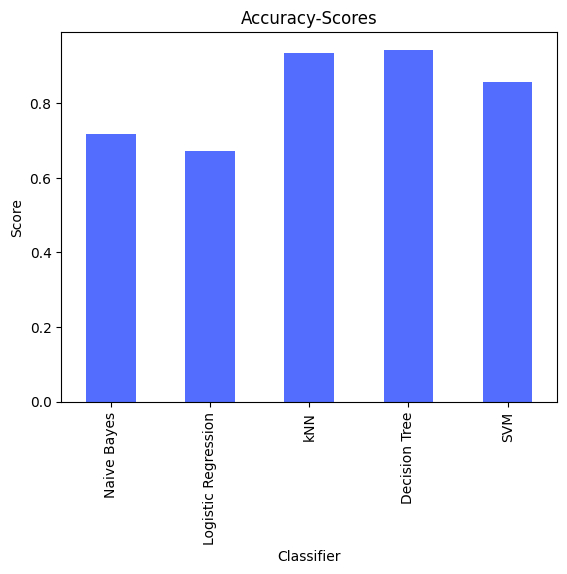

In [ ]:
#Accuracy Score Comparison
plt9 = acc_scores.plot(kind='bar', color = '#536dfe')
plt9.set(title = "Accuracy-Scores", xlabel = "Classifier", ylabel = "Score")
plt9.set_xticklabels(labels)

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

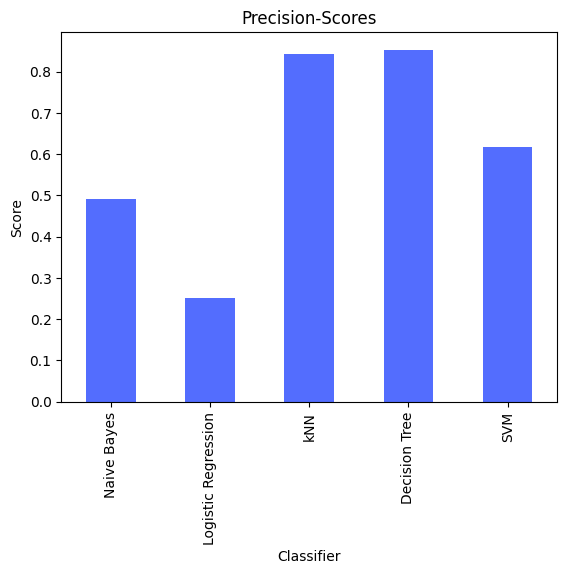

In [ ]:
#Precision Score Comparison
plt10 = pre_scores.plot(kind='bar', color = '#536dfe')
plt10.set(title = "Precision-Scores", xlabel = "Classifier", ylabel = "Score")
plt10.set_xticklabels(labels)

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

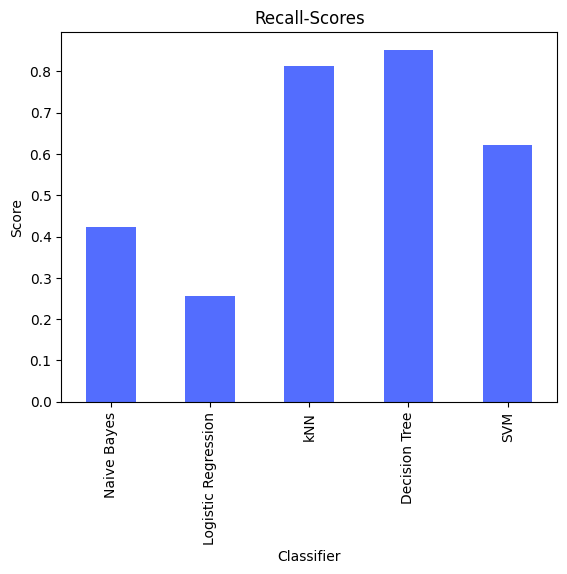

In [ ]:
#Recall Score Comparison
plt11 = rec_scores.plot(kind='bar', color = '#536dfe')
plt11.set(title = "Recall-Scores", xlabel = "Classifier", ylabel = "Score")
plt11.set_xticklabels(labels)

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

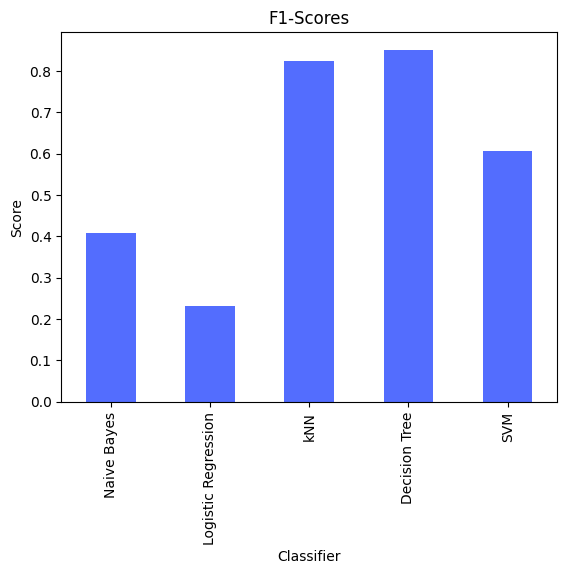

In [ ]:
#F1-Score Comparison
plt12 = f1_scores.plot(kind='bar', color = '#536dfe')
plt12.set(title = "F1-Scores", xlabel = "Classifier", ylabel = "Score")
plt12.set_xticklabels(labels)

In [ ]:
table=pd.DataFrame({"Accuracy":[as1, as2, as3, as4, as5],
                    "Recall":[rs1, rs2, rs3, rs4, rs5],
                    "Precision ":[ps1, ps2, ps3, ps4, ps5],
                   "f1_scores ":[fs1, fs2, fs3, fs4, fs5]},
                   index=['Naive Bayes', 'Logistic Regression', 'kNN', 'Decision Tree', 'SVM'])
table

,Accuracy,Recall,Precision,f1_scores
Naive Bayes,0.716238,0.423784,0.490989,0.409112
Logistic Regression,0.672772,0.257185,0.252066,0.230971
kNN,0.934664,0.812802,0.842096,0.825461
Decision Tree,0.943138,0.852452,0.852966,0.851774
SVM,0.857299,0.621843,0.616775,0.606804
